Leer los datos

In [21]:
import pandas as pd     
df = pd.read_csv('data.csv')

In [22]:
df.head()

,Nombre,Handle de Codeforces,Rating de Codeforces,Ranking IOI 2019,Ranking IOI 2020,Ranking IOI 2021,Ranking IOI 2022,Ranking IOI 2023,Ranking IOI 2024,Pais,Highest Rated Problem
0,Kangyang Zhou,orzdevinwang,3529.0,NaN,NaN,NaN,NaN,NaN,100.00,China,3500.0
1,Adam Gąsienica-Samek,adam_gs,2876.0,NaN,NaN,NaN,NaN,85.71,99.72,Poland,3100.0
2,Brian Xue,hyforces,2503.0,NaN,NaN,NaN,NaN,NaN,99.43,United States,3000.0
3,Daniel Weber,CommandMaster,2276.0,NaN,NaN,NaN,92.55,93.43,99.15,Israel,2400.0
4,Agastya Goel,gustergoose27,2448.0,NaN,NaN,NaN,NaN,98.29,99.15,United States,2500.0


In [23]:
# eliminar columna Handle de Codeforces
df.drop('Handle de Codeforces', axis=1, inplace=True)

In [24]:
print(len(df.loc[(df['Rating de Codeforces'].isna()) | (df['Rating de Codeforces'] == '')]) * 100 / len(df))

df_no_missing = df.loc[(df['Rating de Codeforces'].notna()) & (df['Rating de Codeforces'] != '')]


24.37673130193906


In [25]:
from sklearn.model_selection import train_test_split

# Suponiendo que df_no_missing ya está cargado y limpio
# Selecciona las columnas relevantes
df_reduced = df_no_missing[['Rating de Codeforces', 'Ranking IOI 2024','Highest Rated Problem']]

# Aplica el One-Hot Encoding a la columna 'Pais'
# df_reduced = pd.get_dummies(df_reduced, columns=['Pais'], drop_first=True)

# Define las características (X) y la variable objetivo (y)
X = df_reduced.drop('Ranking IOI 2024', axis=1)
y = df_reduced['Ranking IOI 2024']

# Divide los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Muestra las primeras filas de X_train y X_test después de aplicar One-Hot Encoding
print("X_train:")
print(len(X_train))
print("\nX_test:")
print(len(X_test))


X_train:
204

X_test:
69


Ahora a crear el modelo

Resultados de validación cruzada:
MSE por fold: [412.3850561  362.3480405  395.78232841 419.06475445 541.12200233
 273.88048583 383.94829409 351.07291133 325.82691773 347.28245204]
MSE promedio (validación cruzada): 381.2713

Resultados en el conjunto de prueba:
Mean Squared Error (MSE): 352.3865
R-squared (R²): 0.5237


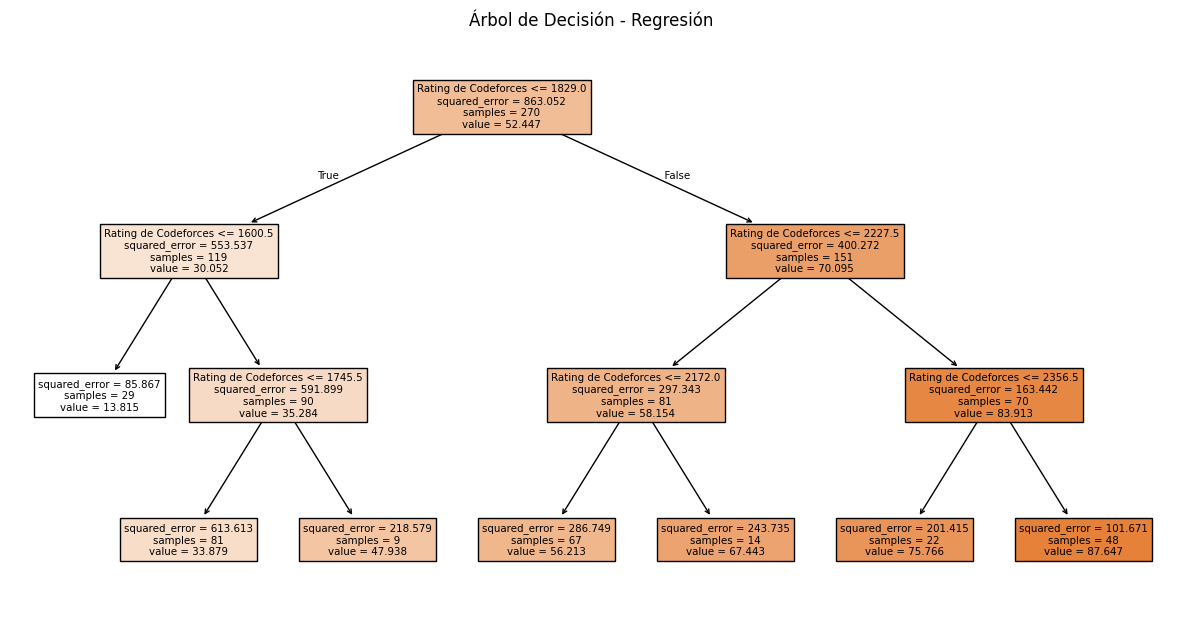

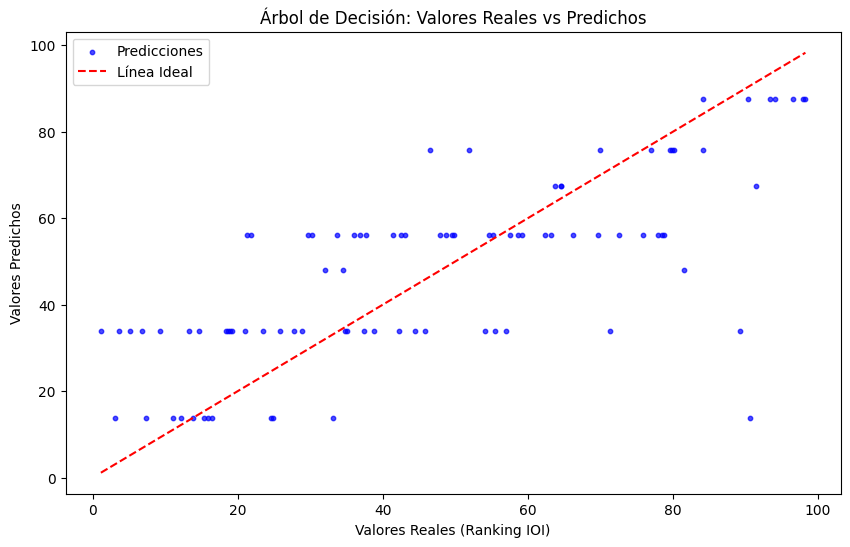

Cantidad de puntos:  361


In [29]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Datos (asegúrate de tener tu DataFrame 'df' con las columnas correspondientes)
X = df['Rating de Codeforces'].values.reshape(-1, 1)  # Feature
y = df['Ranking IOI 2024'].values  # Target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

# Inicializar el modelo de árbol de decisión para regresión
regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=4.336058468797766)

# Configurar KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convertir MSE negativo a positivo
mse_scores = -cv_scores
print("Resultados de validación cruzada:")
print(f"MSE por fold: {mse_scores}")
print(f"MSE promedio (validación cruzada): {mse_scores.mean():.4f}")

# Ajustar el modelo al conjunto de entrenamiento
regressor.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el modelo usando MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResultados en el conjunto de prueba:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 7.5))
plot_tree(regressor, filled=True, feature_names=['Rating de Codeforces'])
plt.title("Árbol de Decisión - Regresión")
plt.show()

# Graficar los valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, s=10, color='blue', alpha=0.7, label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea Ideal')
plt.xlabel('Valores Reales (Ranking IOI)')
plt.ylabel('Valores Predichos')
plt.title('Árbol de Decisión: Valores Reales vs Predichos')
plt.legend()
plt.show()

print("Cantidad de puntos: ", len(X))


Testing Data Set

Mean Squared Error (MSE): 185.6143153969462
R-squared (R²): 0.7750289581618661


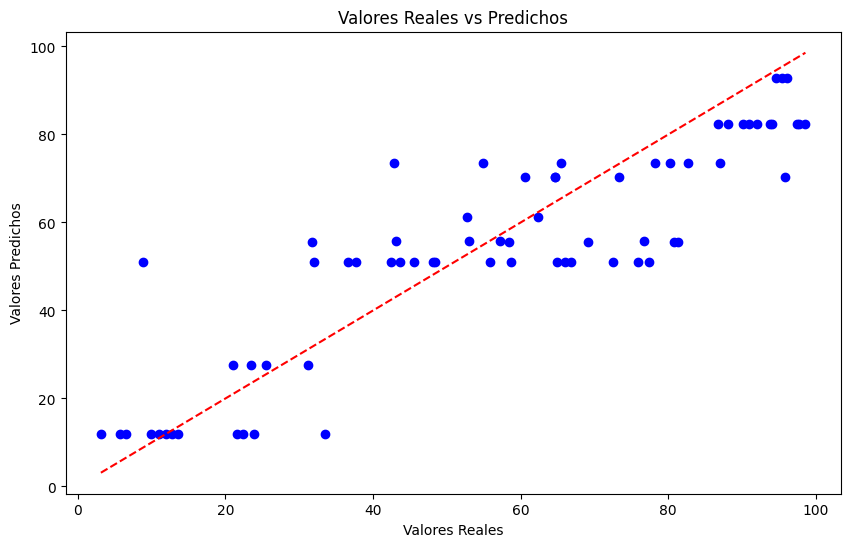

In [27]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el modelo usando el Error Cuadrático Medio (MSE) y el R-squared (R²)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Opcional: Graficar los valores reales vs. los predichos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.show()


In [28]:
import numpy as np

# Supongamos que X.columns contiene los nombres de las características utilizadas en el modelo
feature_names = X.columns

# Solicitar al usuario que ingrese los valores de las características
print("Por favor, ingresa los valores para las siguientes características:")
user_input = []
for feature in feature_names:
    value = float(input(f"Ingrese el valor para '{feature}': "))
    user_input.append(value)

# Convertir los valores ingresados a un formato compatible con el modelo
user_input = np.array(user_input).reshape(1, -1)

# Realizar la predicción
predicted_value = regressor.predict(user_input)

# Mostrar el resultado
print(f"La predicción para los valores ingresados es: {predicted_value[0]:.2f}")


Por favor, ingresa los valores para las siguientes características:


ValueError: could not convert string to float: ''